## Imports

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, cross_val_score

#### val score da unicamente el score vs validate da mas resultados

# Linear Regression

🎯 In this exercise, you will model the performance of an NBA player's win rating (`win_rating`) according to their game statistics (like minutes played, `mp`). 

❓ Load the `NBA.csv` dataset into this notebook as a pandas dataframe, and display its first 5 rows.

In [47]:
nba_data = pd.read_csv('NBA.csv')
nba_data.head()

,season,poss,mp,do_ratio,pacing,win_rating
0,1987,4847,2409,-1.546275,-0.599918,1.643091
1,2017,5582,2708,0.996587,0.531888,10.808427
2,2016,4976,2407,0.242598,0.127976,3.054773
3,2021,1178,585,-1.343806,-1.201034,0.230004
4,1988,4534,2056,-1.813990,-0.128997,0.905614


ℹ️ You can read a detailed description of the dataset in the challenge README. Make sure to refer to it throughout the challenge.

## 1. Define Feature Set and Target

🎯 The first objective is to model the players' overall performance rating compared to peers, called *Wins Above Replacement*, (`win_rating`) against the minutes that they've played (`mp`)

❓ Assign those two variables to `X` and `y`. Remember that `X` is the feature(s), and `y` is the target.

In [48]:
x = nba_data[['mp']]
y = nba_data['win_rating']
x.head(), y.head()

(     mp
 0  2409
 1  2708
 2  2407
 3   585
 4  2056,
 0     1.643091
 1    10.808427
 2     3.054773
 3     0.230004
 4     0.905614
 Name: win_rating, dtype: float64)

👇 In a [scatter plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html), visualize the relationship between the rating and the minutes played.

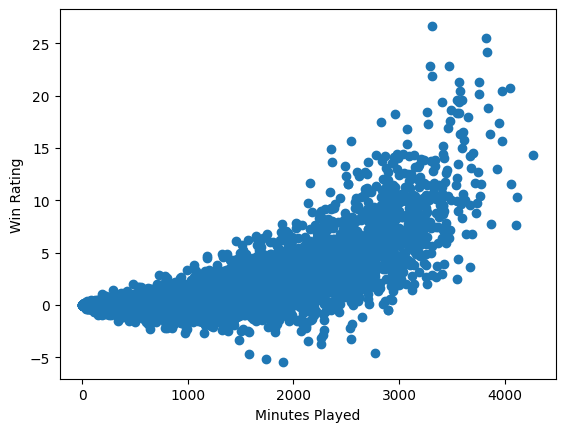

In [49]:
plt.scatter(x, y)
plt.xlabel("Minutes Played")
plt.ylabel("Win Rating");

ℹ️ The scatter plot should hint that there is a relationship. But is it a perfectly linear relationship? 🤔 We'll see!

## 2. Cross-Validation

👇 Using Sklearn's [`cross_validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html), run a 5-fold cross-validation on a [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) model predicting the player performance rating from minutes played. Save the raw output of the cross-validation under a new variable called `cv_results`.

In [50]:
model = LinearRegression()
cv_results = cross_validate(model, x, y, cv=5)
print(cv_results['test_score'])
cv_results['test_score'].mean()

[0.5555057  0.53447908 0.53790391 0.57658459 0.57917762]


0.556730180006891

fit time =  El tiempo que tomó entrenar el modelo en cada cv

score_time: El tiempo que tomó evaluar el modelo en cada cv

test_score: Las puntuaciones del modelo para cada cv

❓ What is the lowest score of the cross-validation? Compute your answer and save the value under a new variable called `min_score`.

In [51]:
min_score = cv_results['test_score'].min()
min_score

0.5344790822272503

❓ What is the highest score of the cross-validation?  Compute your answer and save the value under a new variable called `max_score`.

In [52]:
max_score = cv_results['test_score'].max()
max_score

0.5791776193355004

❓ What is the mean score of the cross-validation? Compute your answer and save the value under a new variable called `mean_score`.

In [53]:
mean_score = cv_results['test_score'].mean()
mean_score

0.556730180006891

ℹ️ When running a cross-validation, we always look at the mean score as the most robust and representative evaluation of the model's performance.

### ☑️ Test your code

In [54]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'cv_results',
    cv_result = cv_results,
    mean_score = mean_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /root/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /root/code/MonicaVenzor/05-ML/01-Fundamentals-of-Machine-Learning/data-linear-regression/tests
plugins: anyio-3.6.2, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 2 items

test_cv_results.py::TestCvResults::test_cv_mean PASSED                   [ 50%]
test_cv_results.py::TestCvResults::test_cv_results PASSED                [100%]

============================== 2 passed in 0.18s ===============================


💯 You can commit your code:

git add tests/cv_results.pickle

git commit -m 'Completed cv_results step'

git push origin master



❓ Plot the evolution of **<u>total</u> computational time (fitting and scoring)** and **<u>mean</u> score** as `K` increases from 2 to 20.

In [65]:
#lo mismo pero haciendo un dataframe
#frames = []
#for k in range(2, 21):
#    cv_results_k = cross_validate(model, x, y, cv=k)
#    total_time = cv_results_k['fit_time'].sum() + cv_results_k['score_time'].sum()
#    mean_score_k = cv_results_k['test_score'].mean()
#    temp_df = pd.DataFrame({'K': [k], 'Total Time': [total_time], 'Mean Score': [mean_score_k]})
#    frames.append(temp_df)
#cv_data = pd.concat(frames, ignore_index=True)
#cv_data

In [97]:
total_times = []
mean_scores = []

for k in range(2, 21):
    cv_results_k = cross_validate(model, x, y, cv=k)
    total_time = cv_results_k['fit_time'].sum() + cv_results_k['score_time'].sum()
    mean_score_k = cv_results_k['test_score'].mean()
    total_times.append(total_time)
    mean_scores.append(mean_score_k)

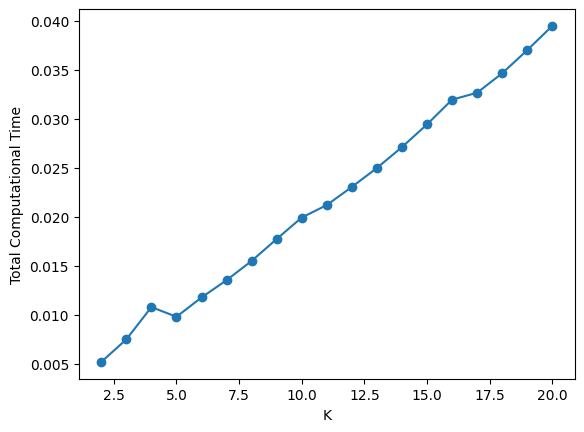

In [98]:
plt.plot(range(2, 21), total_times, marker='o')
plt.xlabel("K")
plt.ylabel("Total Computational Time");

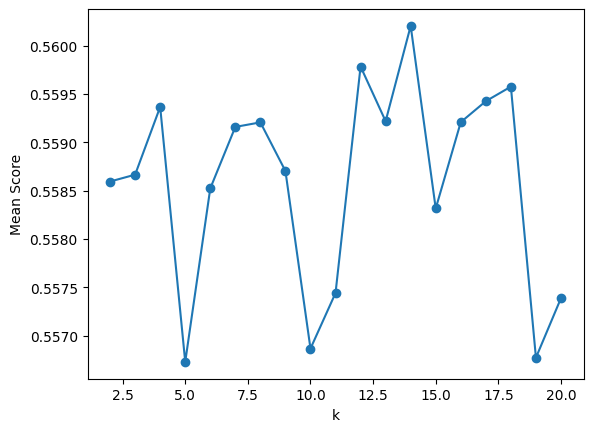

In [99]:
plt.plot(range(2, 21), mean_scores, marker='o')
plt.xlabel("k")
plt.ylabel("Mean Score");

ℹ️ You should see that the $R^2$ score stays stable, which is a good sign that the model performs equally on smaller and larger test sizes. Meanwhile, the computational time keeps increasing. For that reason, we do not exceed K = 10 as a rule of thumb.

## 3. Train the Model

Cross-validation does not train a model, it evaluates a hypothetical model on the dataset. If you want to use the model to, for example, make predictions, you will need to train it outside of the cross-validation.

❓ Go ahead and train the model on the full `X` and `y` (as we've already validated the model's score, and now will use it to predict). Save the trained model under the variable `model`.

In [113]:
model.fit(x, y)

LinearRegression()

In [114]:
model.coef_

array([0.00260258])

In [115]:
model.intercept_

-1.5463749371639444

❓ What is the slope of your trained model? It can be accessed via the model's attributes. Save the slope under a variable named `slope`.

In [116]:
slope = model.coef_[0]
slope

0.002602579938640193

❓ What is the intercept of your trained model? It can be accessed via the model's attributes. Save the intercept under a variable named `intercept`.

In [117]:
intercept = model.intercept_
intercept

-1.5463749371639444

🤔 Make sure you understand how to interpret these coefficients before moving on.

NOTA:
Pendiente (slope): win_rating por cada minuto adicional jugado, un aumento de un minuto en el tiempo de juego está asociado con un aumento de aproximadamente 0.0026 win_rating

Intercepción (intercept): −1.546, lo cual podría interpretarse como un valor base de win_rating para alguien que no ha jugado.

### ☑️ Test your code

In [118]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'trained_model',
    slope = slope,
    intercept = intercept
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /root/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /root/code/MonicaVenzor/05-ML/01-Fundamentals-of-Machine-Learning/data-linear-regression/tests
plugins: anyio-3.6.2, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 2 items

test_trained_model.py::TestTrainedModel::test_intercept PASSED           [ 50%]
test_trained_model.py::TestTrainedModel::test_slope PASSED               [100%]

============================== 2 passed in 0.08s ===============================


💯 You can commit your code:

git add tests/trained_model.pickle

git commit -m 'Completed trained_model step'

git push origin master



## 4. Predict

❓ Use your trained model to predict the performance rating of a player who has played 1000 minutes in total. Save the predicted value in a variable called `prediction`.

In [130]:
new_data = pd.DataFrame({'mp': [1000]})
prediction = model.predict(new_data)[0]
prediction

1.0562050014762487

### ☑️ Test your code

In [131]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'prediction',
    prediction = prediction
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /root/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /root/code/MonicaVenzor/05-ML/01-Fundamentals-of-Machine-Learning/data-linear-regression/tests
plugins: anyio-3.6.2, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 1 item

test_prediction.py::TestPrediction::test_prediction PASSED               [100%]

============================== 1 passed in 0.07s ===============================


💯 You can commit your code:

git add tests/prediction.pickle

git commit -m 'Completed prediction step'

git push origin master



## 5. Improving the Model with More Features

Your friend who enjoys the NBA fantasy league comes to you with some insights 🏀

They say that when evaluating a player's Wins Above Replacement rating, they would typically also look at the number of ball possessions (`poss`) el tiempo que tiene un jugador dentro del equipo cada vez que tiene la pelota, their defense/offense ratio, and their pacing.

❓ Visualize the correlation between these new features and the `win_rating`. You can use `matplotlib` or `seaborn`. Which **one** of the above features would you consider adding to your model?

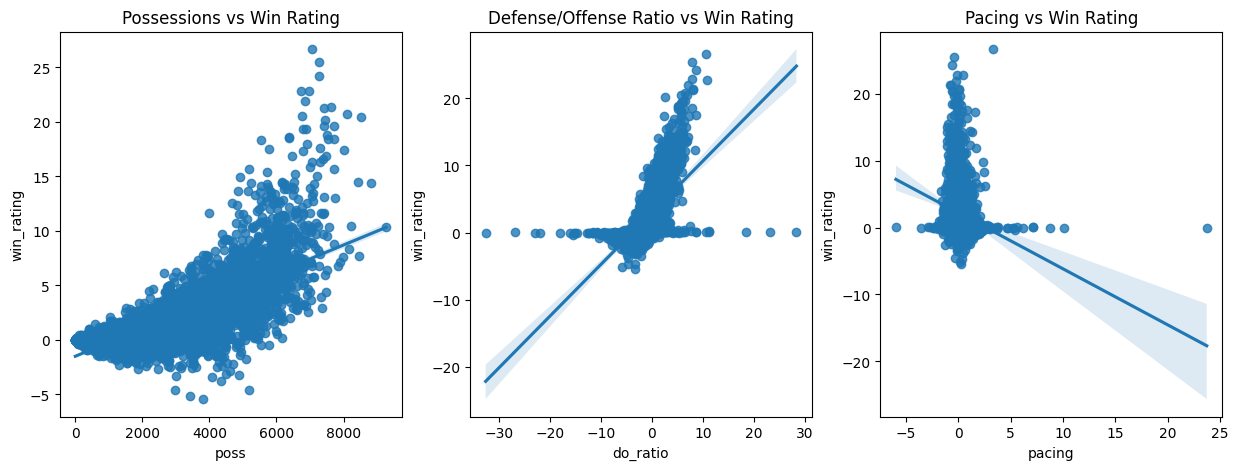

In [136]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.regplot(data=nba_data, x='poss', y='win_rating')
plt.title("Possessions vs Win Rating")
plt.subplot(1, 3, 2)
sns.regplot(data=nba_data, x='do_ratio', y='win_rating')
plt.title("Defense/Offense Ratio vs Win Rating")
plt.subplot(1, 3, 3)
sns.regplot(data=nba_data, x='pacing', y='win_rating')
plt.title("Pacing vs Win Rating");

<details>
    <summary>💡 Click here for a hint</summary>
    A seaborn <code>regplot</code> might be very handy here.
</details>

Now let's see if the model with two features (the new one you picked and `mp`) is better at predicting a player's rating than our first model.

❓ Create a new set of features - it should be a DataFrame with two columns.

In [149]:
x_ = nba_data[['mp', 'do_ratio']]
x_

,mp,do_ratio
0,2409,-1.546275
1,2708,0.996587
2,2407,0.242598
3,585,-1.343806
4,2056,-1.813990
...,...,...
3995,565,-1.761425
3996,1785,0.907199
3997,378,0.848178
3998,156,-6.298906


❓ Now cross-validate a new linear regression model and save the **mean** score to `mean_2_feat_score`.

> Note: if you only care about the cross-validation score, you can use sklearn's [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

In [150]:
model_two = LinearRegression()
mean_2_feat_score = cross_val_score(model_two, x_, y, cv=5).mean()
mean_2_feat_score

0.6317728310765246

### ☑️ Test your code

In [151]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'improved_score',
    improved_score = mean_2_feat_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /root/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /root/code/MonicaVenzor/05-ML/01-Fundamentals-of-Machine-Learning/data-linear-regression/tests
plugins: anyio-3.6.2, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 1 item

test_improved_score.py::TestImprovedScore::test_improved_score PASSED    [100%]

============================== 1 passed in 0.08s ===============================


💯 You can commit your code:

git add tests/improved_score.pickle

git commit -m 'Completed improved_score step'

git push origin master



You should see an **increase of around 8%** in your $R^2$ 👏

Congrats, you just performed your first manual *feature selection* - we'll see more ways to do that this week!

🤔 But is this the best we can do with Linear Regression? Let's explore more in the next challenge!

# 🏁